# Introduction

## (Men take more risks, but women are better at surviving)

This is the project 2 of Data Anylist Nanodegree, 2017. it will be evaluated by this requirements
https://review.udacity.com/#!/rubrics/107/view
We will try here to study the Titanic data of 891 passengers in order to do wrangling and bring useful findings at the end. <br>

---------------------
##### Helpful tools

It will be very helpful to import pandas for this case because it will make our task very easy especially with dealing with csv files

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

-------
Now, we will read the csv data.

In [3]:
# get titanic data
data = pd.read_csv('titanic-data.csv')

# preview the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# calculating the missing value in each column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 1- Questioning Stage
After taking a look at the data, we can see there is a label of this data "Survived" represents whether or not the passenger died. Thus, I came with this qestion.
##### how is the percentage of being survived varying with the passenger gender and age?


--------

-------------------------
## 2 - Wrangling Stage
#### ( acquisition, cleaning)

One of the most important stages of data analyst is cleaning data, so sometimes we might need to transfer some columns to other expression or delete unuseful columns or fixed missing value. <br>
Right now I suggest removing unuseful columns like Name, SibSp, Parch, Fare, Ticket, and PassengerId becouse they are not nassesry in our case. <br>
In addition, there is 687 missing value in Cabin column wich is considerd as a high percentage 77%, so figuring out the missing values will be insignificant becouse 77% values of this column are missing. <br>

In [5]:
data = data.drop(['PassengerId','Name', 'SibSp', 'Parch', 'Fare','Ticket','Cabin'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [8]:
pd.DataFrame.describe(data)  # = data.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


### Fix the missing values
Since we are going to use 'Age' column, We shall fill the missing value in 'Age'. For the Age, we will use the mean value for each gender and we will fill male missing value with Age male mean, and the same thing with female missing value.

resource (https://chrisalbon.com/python/pandas_missing_data.html)

In [9]:
# First, we will check the median of male and female Age
mean_missing_Age_value = data[['Age', 'Sex']].groupby(['Sex'], as_index=False).median().sort_values(by='Sex', ascending=True)
print mean_missing_Age_value

      Sex   Age
0  female  27.0
1    male  29.0


In [10]:
# Other way to find median
#def mymed(group):
    #return np.median(group.dropna())

#mew = data.groupby('Sex')['Age'].apply(mymed)
#mew

In [11]:
# Fill in missing in Age with each Sex's mean value of Age
data['Age'].fillna(data.groupby('Sex')['Age'].transform('median'), inplace=True)

In [12]:
# we can check the new values by printing data
#data

In [13]:
# Check again the mean of male and female Age
mean_missing_Age_value = data[['Age', 'Sex']].groupby(['Sex'], as_index=False).median().sort_values(by='Sex', ascending=True)
print mean_missing_Age_value

      Sex   Age
0  female  27.0
1    male  29.0


We can ensure that the new values that are added to the missing values
don't change the median of male and female Age

------

In [14]:
#medianprint data.count()
print "\n \n"
print " The number of missing value for each variable"
print data.isnull().sum()


 

 The number of missing value for each variable
Survived    0
Pclass      0
Sex         0
Age         0
Embarked    2
dtype: int64


## 2 - Explore
#### ( building intuition, finding patterns)


Now, we are going to answer our qestion

In [15]:
grouped_data = data.groupby('Sex')
print grouped_data.sum()

        Survived  Pclass       Age
Sex                               
female       233     678   8717.00
male         109    1379  17515.17



------------------



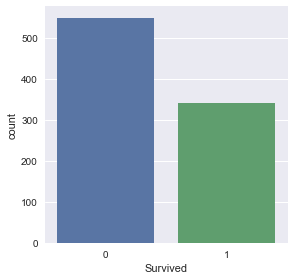

In [16]:
sns.factorplot('Survived',data = data,kind='count')


In [25]:
# the persentage of overall surviving passenger
per_sur = data['Survived'].mean()

print "The persentage of overall surviving passenger is {} %".format(round(per_sur* 100, 2))


The persentage of overall surviving passenger is 38.38 %


In [26]:
# explore the Age statistic
data['Age'].describe()

count    891.000000
mean      29.441268
std       13.018747
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

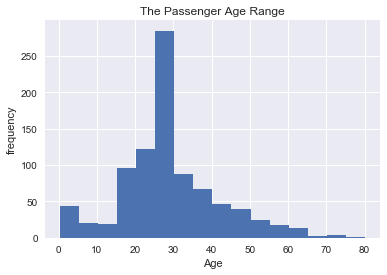

In [38]:
# Getting the the histogram of the passenger age range
plt.hist(data.Age,bins=16)
plt.title('The Passenger Age Range')
plt.xlabel('Age')
plt.ylabel('frequency')

The age are varied from 0 to 80 years, and the mean are located from 25 to 30.



------------

#### Categorize the Age value

It will be very helpfull to group the age values into 3 to 5 groups

In [28]:
# add new column for grouping Age
age = data['Age']
def convert_age(age):
    if age >= 61:
        return 'E (61 to 80)'
    if age >= 46:
        return 'D (46 to 60)'
    if age >= 31:
        return 'C (31 to 45)'
    if age >= 16:
        return 'B (16 to 30)'
    else:
        return 'A (0 to 15)'

age = age.apply(convert_age)

In [29]:
data['age_conv'] = age
data.head()

,Survived,Pclass,Sex,Age,Embarked,age_conv
0,0,3,male,22.0,S,B (16 to 30)
1,1,1,female,38.0,C,C (31 to 45)
2,1,3,female,26.0,S,B (16 to 30)
3,1,1,female,35.0,S,C (31 to 45)
4,0,3,male,35.0,S,C (31 to 45)


In [30]:
# Make sure the age_conv has the same length of your data
data['age_conv'].count()

891

In [31]:
# printing the survival rate of each group
x_data = data[['age_conv', 'Survived']].groupby(['age_conv'], as_index=False).mean().sort_values(by='age_conv', ascending=True)

print x_data

       age_conv  Survived
0   A (0 to 15)  0.590361
1  B (16 to 30)  0.334653
2  C (31 to 45)  0.425743
3  D (46 to 60)  0.417722
4  E (61 to 80)  0.227273


In [32]:
# printing the number of passenger who survived or died for each group
df = data.groupby(['age_conv', 'Survived']).size().reset_index().rename(columns={0:'count'})
print df

       age_conv  Survived  count
0   A (0 to 15)         0     34
1   A (0 to 15)         1     49
2  B (16 to 30)         0    336
3  B (16 to 30)         1    169
4  C (31 to 45)         0    116
5  C (31 to 45)         1     86
6  D (46 to 60)         0     46
7  D (46 to 60)         1     33
8  E (61 to 80)         0     17
9  E (61 to 80)         1      5


In [33]:
# printing the number of passenger who survived or died
# for each group with different gender
df = data.groupby(['age_conv', 'Sex', 'Survived']).size().reset_index().rename(columns={0:'count'})
print df

        age_conv     Sex  Survived  count
0    A (0 to 15)  female         0     15
1    A (0 to 15)  female         1     28
2    A (0 to 15)    male         0     19
3    A (0 to 15)    male         1     21
4   B (16 to 30)  female         0     47
5   B (16 to 30)  female         1    122
6   B (16 to 30)    male         0    289
7   B (16 to 30)    male         1     47
8   C (31 to 45)  female         0     15
9   C (31 to 45)  female         1     57
10  C (31 to 45)    male         0    101
11  C (31 to 45)    male         1     29
12  D (46 to 60)  female         0      4
13  D (46 to 60)  female         1     23
14  D (46 to 60)    male         0     42
15  D (46 to 60)    male         1     10
16  E (61 to 80)  female         1      3
17  E (61 to 80)    male         0     17
18  E (61 to 80)    male         1      2


In [34]:
# the male survival rate percentage
xr = [2,6,10,14,17]
y =[]
for i in xr:
    r = i
    z = r + 1
    y.append(100 * float(df['count'][z])/(df['count'][r]+df['count'][z]))

print y

[52.5, 13.988095238095237, 22.307692307692307, 19.23076923076923, 10.526315789473685]


In [35]:
# the feamle survival rate percentage
xr = [0,4,8,12]
y =[]
for i in xr:
    r = i
    z = r + 1
    y.append(100 * float(df['count'][z])/(df['count'][r]+df['count'][z]))

print y

[65.11627906976744, 72.18934911242603, 79.16666666666667, 85.18518518518519]


In [36]:
# the overall survival rate of male and female passengers
data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


--------------

#### Survival Rate in different gender and Age
Now, we can answer our question "how is the percentage of being survived varying with the passenger gender and age?" <br>
We will plot two graphs for male and females to show how the number of passengers who survived or died is varied in different gender and age

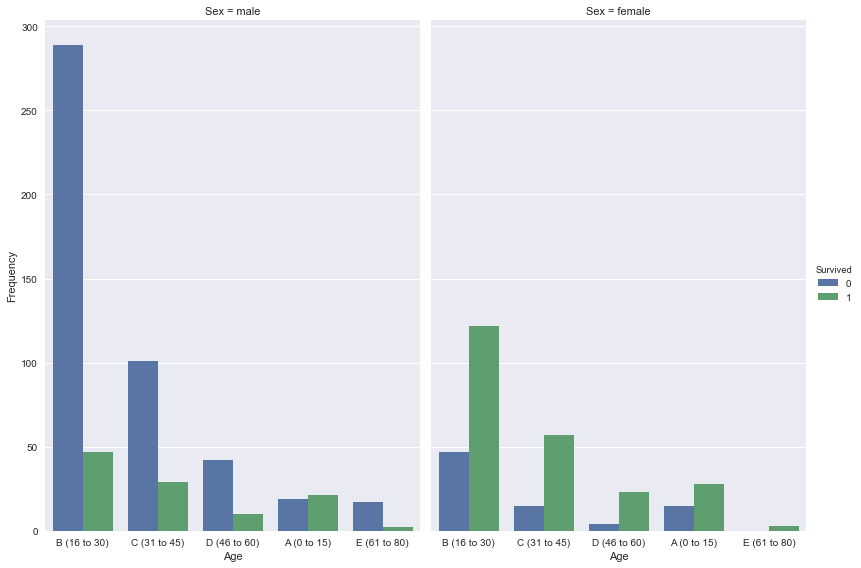

In [48]:
import seaborn as sns
g = sns.factorplot(x="age_conv", hue="Survived", col="Sex", data=data, kind="count", size=8, aspect=.7)

# Set common labels
g.set_axis_labels('Age', 'Frequency')

we can see what variables that can affect the survival percentage to be positive or negative based on passenger's gender and age <br>
The the statistics and graphs above shows that : <br>
1- The female passengers in all age categories have a higher survival rate than males <br>
2- The survival rate of female passengers ranges from 65 to 100 in all age categories, where the average is 74 % <br>
3- The survival rate of male passengers ranges from 10 to 23 in all age categories except the children category " 0 to 15 years" that has 52.5 % of survival rate <br>

## Conclusion

The data statistics show that female passengers are the luckier passengers in Titanic, it might be because the nature of life requires men to protect women for many reasons some of which are: women are the caretakers of children, men are ready to scarify their life for their family, men can take risk more than women.

This study is based on a specific sample from Titanic dataset, so there might be a bias on choosing the studied data. For further studies in future, we need to know how the sample was chosen, we also need to apply some of the machine learning algorithms to predict whether x passenger is survived or not.